# How to become ohsome part 8 - complex analysis with the magical filter parameter

## "CITY CYCLING" is going on - looking for cycleways in OSM for the city of Heidelberg 
It’s CITY CYCLING time – some of you may even be involved in your municipality - a good opportunity to have a look on the OpenStreetMap (OSM) cycling ways in our city Heidelberg.

Welcome to part 8 of our how to become ohsome blog post series. This time we will show you how to set up a more complex filter with several OR and AND combinations for the ohsome API to get the length of the mapped cycling ways in OSM. Like in part 4 of our series, we will again show you in a Jupyter Notebook how you can use Python to make this nice complex ohsome query and visualization in one go.


## 1 Import Python Packages

In [1]:
# The analyses and visualization of results are conducted using Python
# and relevant libraries

# Import "request" HTTP library to enable easier HTTP handling, see
# http://docs.python-requests.org/en/master/
import requests

# Import "json" package for encoding and decoding JSON data, see
# https://docs.python.org/3/library/json.html
import json

# Import "datetime" and "time" module to enable time-related functionalities,
# see https://docs.python.org/3/library/time.html
import datetime
import time

# Import "panda" library for data manipulation and analysis, see
# https://pandas.pydata.org/
import pandas as pd
import matplotlib.pyplot as plt

# ipyleaflet: Interactive maps in the Jupyter notebook
from ipyleaflet import Map, GeoJSON

# set maximum columnwidth for pandas
pd.set_option('max_colwidth', 100)

## 2 Declaring helper function for POST request url:

In [2]:
def elements(agg, **params):
    res = requests.post("https://api.ohsome.org/v1/elements"+agg, params)
    return res

## 3 Define parameters of the POST request

### Heidelberg geojson
Because of the size, data are stored in an external file which can be found [here](https://github.com/GIScience/ohsome-examples/blob/master/python/jupyter-notebooks/HD.geojson).

In [3]:
# Heidelberg boundary as geojson
with open('HD.geojson') as f:
    bpolys = (f.read())

### Define timespan and period

In [4]:
# Define temporal filter, make sure to use ISO-8601 conform timestrings
start_date = '2007-10-08T00:00:01Z'
end_date = '2020-06-29T03:00:00Z'
time_interval = 'P1M'

### Define complex tag filter to get all cycleways
There exist more than one way to tag cycle ways, lanes or paths in OSM, described for example on [this](https://wiki.openstreetmap.org/wiki/DE:Bicycle/Radverkehrsanlagen_kartieren) wiki page. Instead of requesting every possible tag and probably get ways twice, with the new filter all combinations of tags that can be used to declare a cycle way in OSM can be requested at once and at the same time prevent ways from being counted twice.

In [5]:
# Define filter for getting all types of cycleways and paths in OSM
filterCycle = 'type:way and ((bicycle=use_sidepath) or \
(cycleway=opposite and oneway:bicycle=no) or \
(sidewalk:right:bicycle=yes) or \
(cycleway:right=shared_lane) or \
(cycleway:left=track) or \
(cycleway:right=track) or \
(highway=track and bicycle=designated and motor_vehicle=no) or \
(highway=path and bicycle=yes) or \
(highway=path and (bicycle=designated or bicycle=official)) or \
(highway=service and (bicycle=designated or motor_vehicle=no)) or \
(highway=pedestrian and (bicycle=yes or bicycle=official)) or \
(highway=footway and (bicycle=yes or bicycle=official)) or \
(highway=cycleway) or \
(cycleway in (lane, opposite_lane, shared_busway, track, opposite_track)) or \
(cycleway:left in (lane, shared_busway)) or \
(cycleway:right in (lane, shared_busway)) or \
(cycleway:both=lane) or \
(bicycle_road=yes and (motor_vehicle=no or  bicycle=designated)) or \
(cyclestreet=yes))'

## 4 Send POST request to ohsme API and plot result

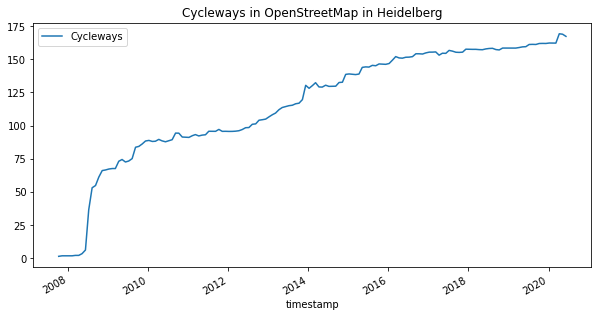

In [6]:
# Send post request to ohsome api,save response and plot result
def length(filter):
    res = elements("/length", filter=filter, bpolys=bpolys,
                   time=f'{start_date}/{end_date}/{time_interval}')
    body = res.json()
    df = pd.DataFrame(body['result'])
    # length is coming in meters, we want to plot km on axis
    df.value = df.value/1000
    df.timestamp = pd.to_datetime(df.timestamp)
    df.rename(columns={'value': "Cycleways"}, inplace=True)
    df.set_index('timestamp', inplace=True)
    # plotting the result
    df.plot(title="Cycleways in OpenStreetMap in Heidelberg", figsize=(10, 5))
    plt.show()


length(filterCycle)

## 5 Get cycleway data from ohsome API

In [7]:
# Send post request to ohsome api data extraction, save response
# geojson and show result on a map
def getGeom(filter):
    res = elements("/geometry", filter=filter, bpolys=bpolys,
                   time='2020-06-29')
    body = res.json()
    return body


cycleGeojson = getGeom(filterCycle)

## 6 Display cycleways on a Web Map

In [8]:
m = Map(center=(49.4101, 8.6831), zoom=14)
geo_json = GeoJSON(data=cycleGeojson)
m.add_layer(geo_json)

display(m)

Map(center=[49.4101, 8.6831], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

To see the map open the notebook in [nbviewer](https://nbviewer.jupyter.org/github/GIScience/ohsome-examples/blob/master/python/jupyter-notebooks/cycling-magic-filter-ohsomeAPI.ipynb)